In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# Load the dataset
# This reads the data into a DataFrame
df=pd.read_csv('Fraud.csv')

In [57]:
data=df.drop(columns=['isFlaggedFraud'],axis=1)

In [173]:
# See the size of the data (rows, columns)
data.shape

(6362620, 10)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [178]:
# Preview the first few rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [180]:
# Check for missing values in each column
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [181]:
# Check for duplicate rows
data.duplicated().sum()

0

In [182]:
# Checking the balance of fraud vs non-fraud
data['isFraud'].value_counts() 

isFraud
0    6354407
1       8213
Name: count, dtype: int64

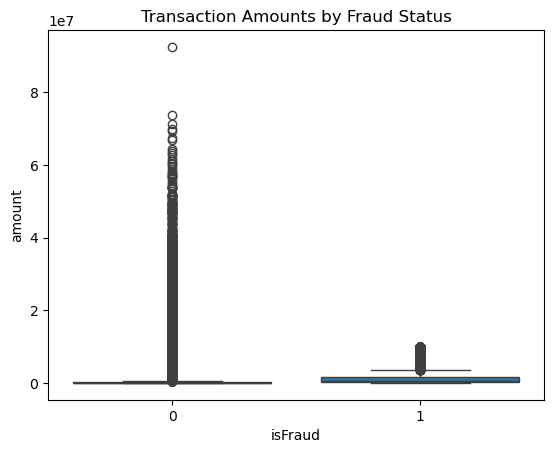

In [64]:
# Visualizing transaction amounts by fraud status
sns.boxplot(data, x='isFraud', y='amount')
plt.title("Transaction Amounts by Fraud Status")
plt.show()

In [186]:
# Check if 'isFraud' exists
if 'isFraud' not in data.columns:
    raise ValueError("Column 'isFraud' not found in the dataset!")

# Calculate correlation matrix
corr = data.corr(numeric_only=True)

# Get top 5 features most correlated with fraud (besides 'is_fraud')
top_corr = corr['isFraud'].drop('isFraud').abs().sort_values(ascending=False).head(5).index.tolist()

# Include 'is_fraud' column for pairplot
top_corr.append('isFraud')
print("Features used for pairplot:", top_corr)

Features used for pairplot: ['amount', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'isFraud']


In [188]:
dp=data[top_corr].sample(200000, random_state=42)
dp

,amount,step,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
3737323,330218.42,278,20866.00,351084.42,452419.57,0
264914,11647.08,15,30370.00,18722.92,0.00,0
85647,152264.21,10,106589.00,258853.21,201303.01,0
5899326,1551760.63,403,0.00,0.00,3198359.45,0
2544263,78172.30,206,2921331.58,2999503.88,415821.90,0
...,...,...,...,...,...,...
670946,717358.21,36,67206.00,0.00,0.00,0
3032934,160399.88,234,10669.00,0.00,241331.72,0
4751985,3270141.36,333,0.00,0.00,3330825.38,0
1239897,373726.88,134,1655191.80,2028918.68,2640312.13,0


<Axes: >

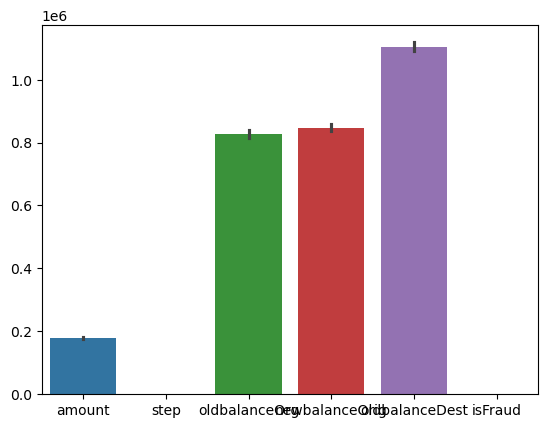

In [190]:
sns.barplot(data=dp)

In [192]:
corelation=dp.corr()

<Axes: >

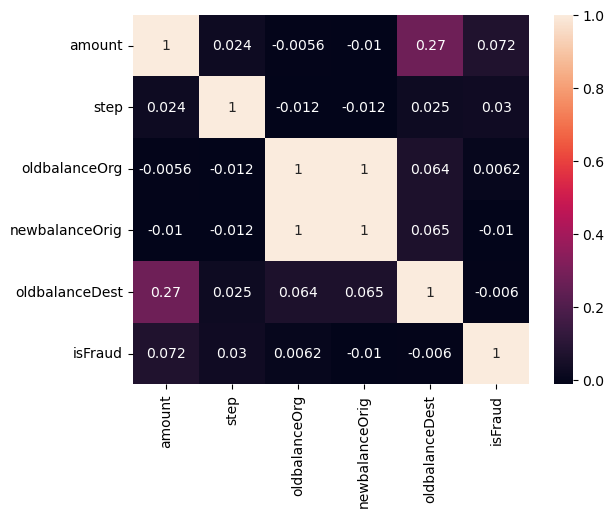

In [194]:
sns.heatmap(data=corelation,annot=True)

In [196]:
corelation

,amount,step,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud
amount,1.000000,0.023513,-0.005645,-0.009980,0.274554,0.072481
step,0.023513,1.000000,-0.012153,-0.012349,0.024520,0.030121
oldbalanceOrg,-0.005645,-0.012153,1.000000,0.998920,0.063681,0.006208
newbalanceOrig,-0.009980,-0.012349,0.998920,1.000000,0.065150,-0.010211
oldbalanceDest,0.274554,0.024520,0.063681,0.065150,1.000000,-0.006029
isFraud,0.072481,0.030121,0.006208,-0.010211,-0.006029,1.000000


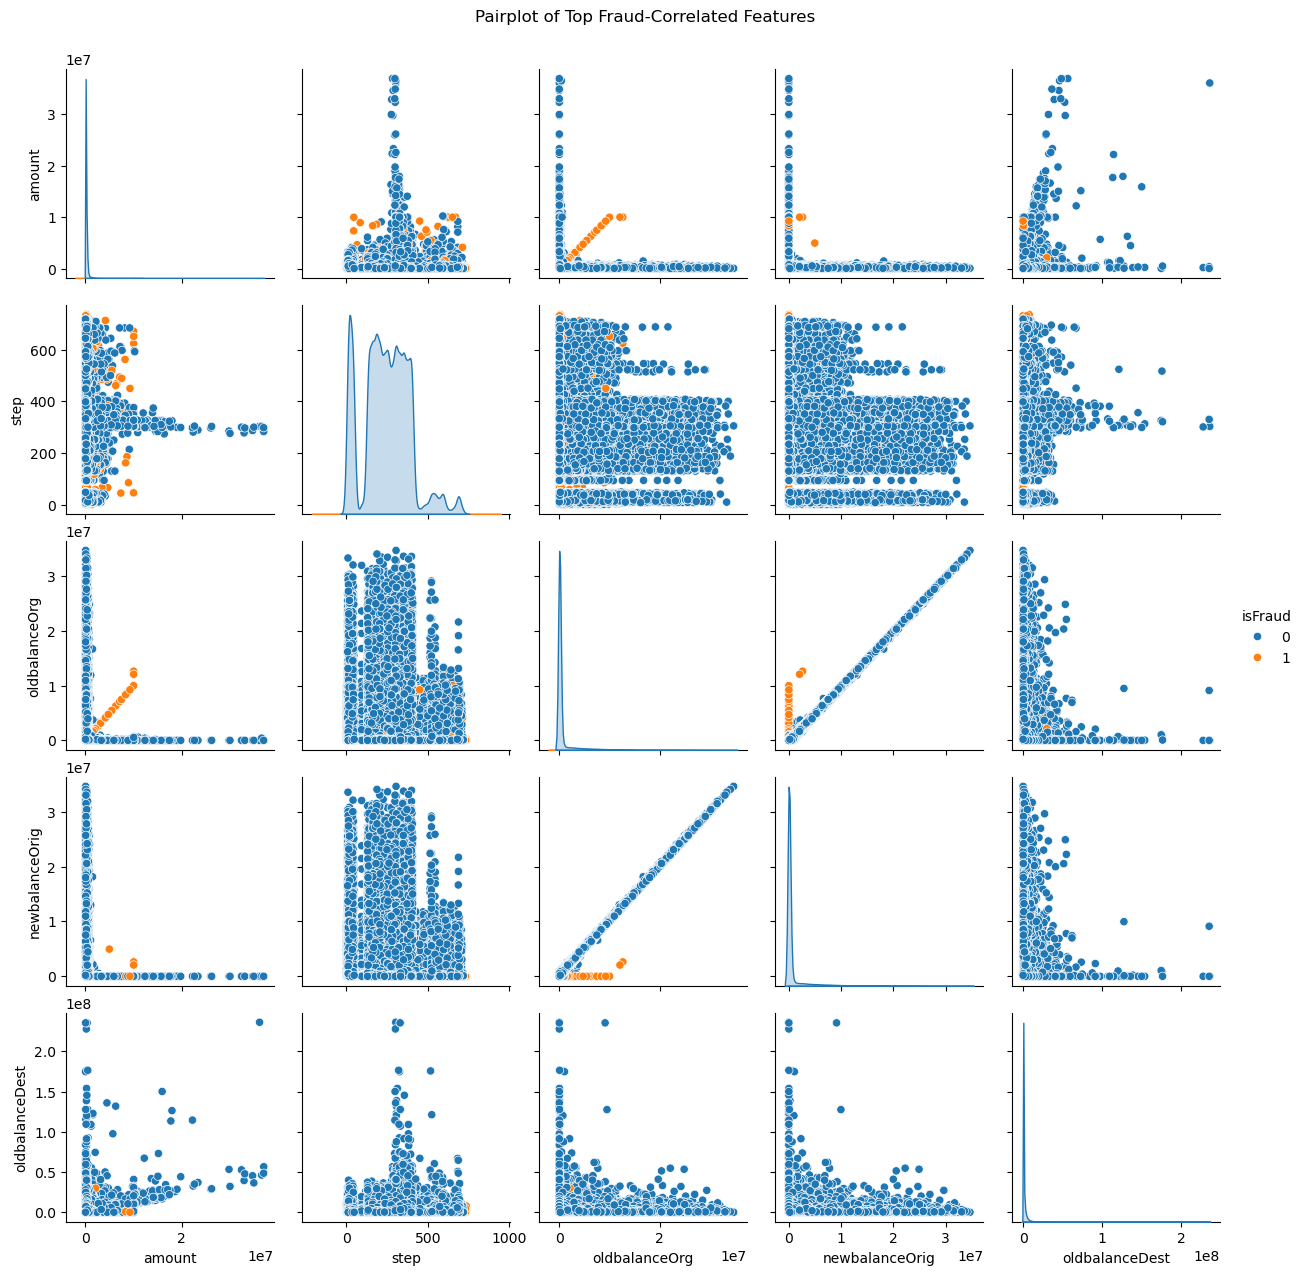

In [197]:
sns.pairplot(hue='isFraud',data=dp)
plt.suptitle("Pairplot of Top Fraud-Correlated Features", y=1.02)
plt.show()

In [132]:
from sklearn.model_selection import train_test_split

In [134]:
# Separate features (X) and target (y)
X = data.drop(columns=['isFraud','type','nameOrig','nameDest'],axis=1)  
Y = data['isFraud']

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=101)

In [138]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler=StandardScaler()

In [142]:
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test)

In [144]:
from sklearn.linear_model import LogisticRegression

In [148]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [150]:
# Train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [154]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

In [156]:
# Evaluation
print("Logistic Regression Report:")
print(classification_report(Y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635454
           1       0.91      0.48      0.63       808

    accuracy                           1.00    636262
   macro avg       0.96      0.74      0.81    636262
weighted avg       1.00      1.00      1.00    636262

ROC AUC Score: 0.9732000975711541


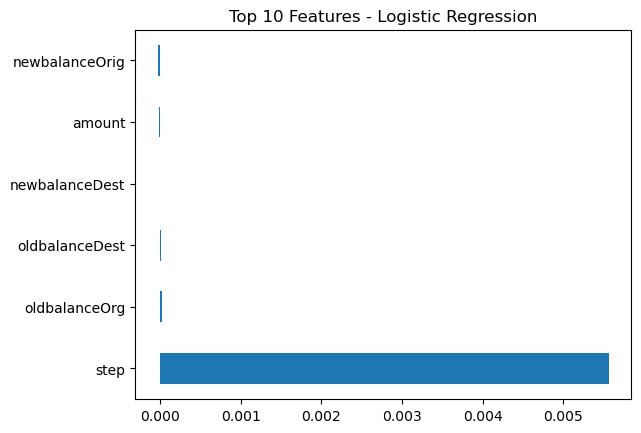

In [162]:
# For logistic regression
coefficients = pd.Series(lr.coef_[0], index=X.columns)
coefficients.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features - Logistic Regression")
plt.show()

In [168]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=10, objective='binary:logistic', eval_metric='logloss')
xgb_model.fit(X_train, Y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

# Evaluation
print("XGBoost Report:")
print(classification_report(Y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_xgb))

XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    635454
           1       0.75      0.93      0.83       808

    accuracy                           1.00    636262
   macro avg       0.88      0.96      0.92    636262
weighted avg       1.00      1.00      1.00    636262

ROC AUC Score: 0.9995720384540224


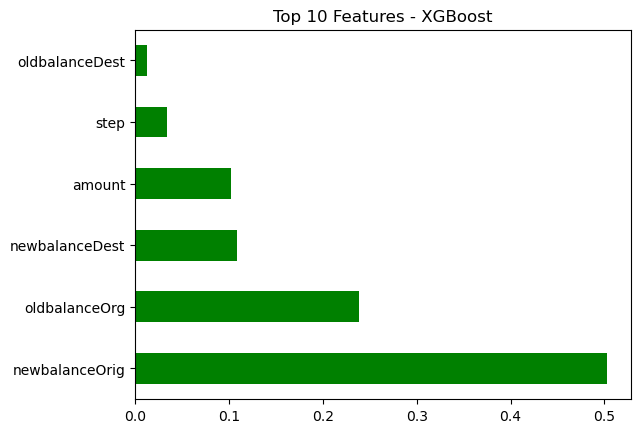

In [169]:
# For XGBoost
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Features - XGBoost")
plt.show()